# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("processed.cleveland.data", header=None)
df.columns = ['age','sex', 'cp', 'restbp', 'chol', 'fbs',  'restecg',  'thalach', 'exang',  'oldpeak', 'slope', 'ca',  'thal',  'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



- **age**,
- **sex**,
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **hd**, diagnosis of heart disease, the predicted attribute

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
restbp,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df['ca'].value_counts(), df['thal'].value_counts(), df['hd'].value_counts()

(ca
 0.0    176
 1.0     65
 2.0     38
 3.0     20
 ?        4
 Name: count, dtype: int64,
 thal
 3.0    166
 7.0    117
 6.0     18
 ?        2
 Name: count, dtype: int64,
 hd
 0    164
 1     55
 2     36
 3     35
 4     13
 Name: count, dtype: int64)

In [7]:
df.loc[(df['ca']=='?') | (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [8]:
df.groupby('ca')['hd'].mean(), df.groupby('thal')['hd'].mean()

(ca
 0.0    0.454545
 1.0    1.276923
 2.0    1.947368
 3.0    2.300000
 ?      0.250000
 Name: hd, dtype: float64,
 thal
 3.0    0.373494
 6.0    1.444444
 7.0    1.658120
 ?      1.000000
 Name: hd, dtype: float64)

In [9]:
# df['ca]==? seems 0 because its hd.means like 0.0
df['ca'] = df['ca'].fillna(0)
df.dropna(inplace=True)

## Feature Engineering

In [10]:
# HAS HD OR NOT
df.loc[df['hd']!=0, 'hd'] =1

# Explorer Data Analysis

## Grapping Categorical and Numerical Variables

In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols= [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != 'O' and
                   dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == 'O' and
                   dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat ]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 303
Variables: 14
cat_cols: 9
num_cols: 5
cat_but_car: 0
num_but_cat: 7


## Categoric Variables

####################### CA #######################
      ca      Ratio
ca                 
0.0  176  58.085809
1.0   65  21.452145
2.0   38  12.541254
3.0   20   6.600660
?      4   1.320132
##################################################


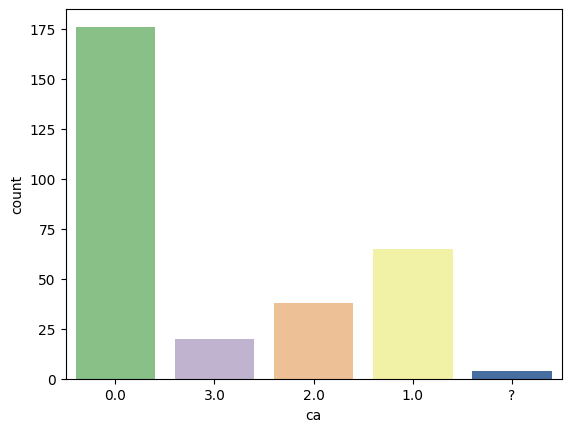

###################### THAL ######################
      thal      Ratio
thal                 
3.0    166  54.785479
7.0    117  38.613861
6.0     18   5.940594
?        2   0.660066
##################################################


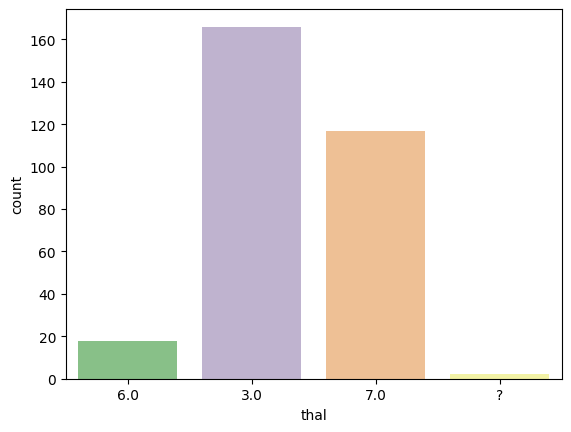

###################### SEX #######################
     sex      Ratio
sex                
1.0  206  67.986799
0.0   97  32.013201
##################################################


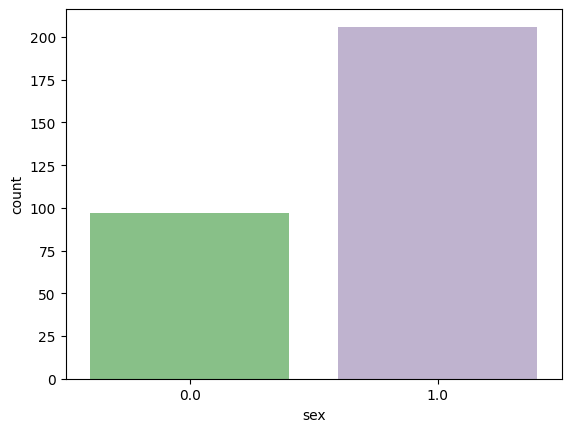

####################### CP #######################
      cp      Ratio
cp                 
4.0  144  47.524752
3.0   86  28.382838
2.0   50  16.501650
1.0   23   7.590759
##################################################


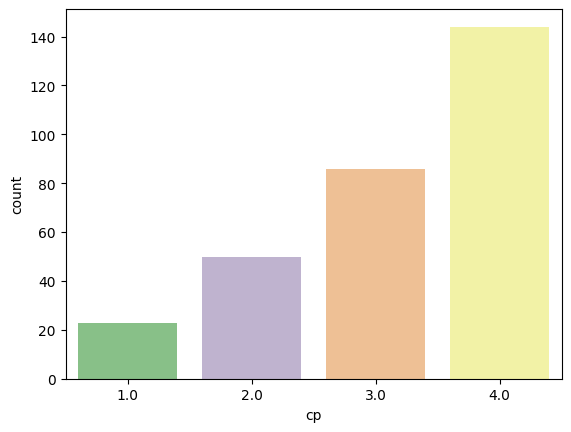

###################### FBS #######################
     fbs      Ratio
fbs                
0.0  258  85.148515
1.0   45  14.851485
##################################################


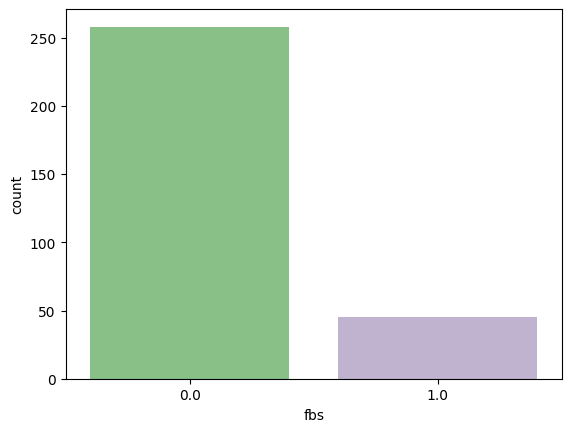

#################### RESTECG #####################
         restecg      Ratio
restecg                    
0.0          151  49.834983
2.0          148  48.844884
1.0            4   1.320132
##################################################


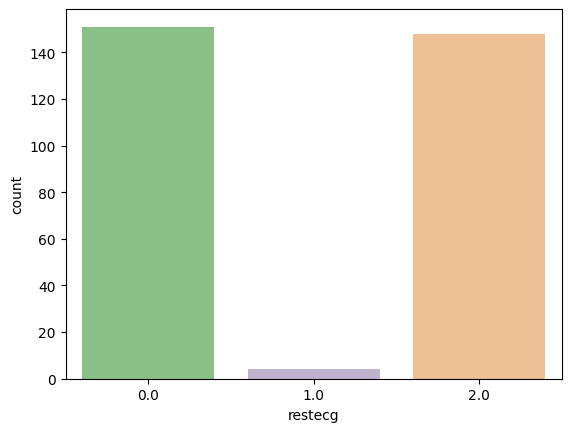

##################### EXANG ######################
       exang      Ratio
exang                  
0.0      204  67.326733
1.0       99  32.673267
##################################################


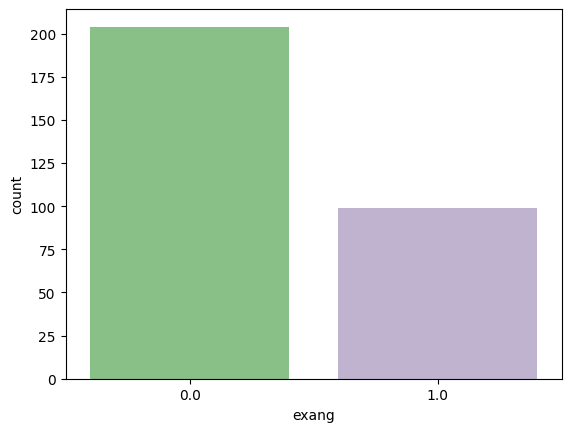

##################### SLOPE ######################
       slope      Ratio
slope                  
1.0      142  46.864686
2.0      140  46.204620
3.0       21   6.930693
##################################################


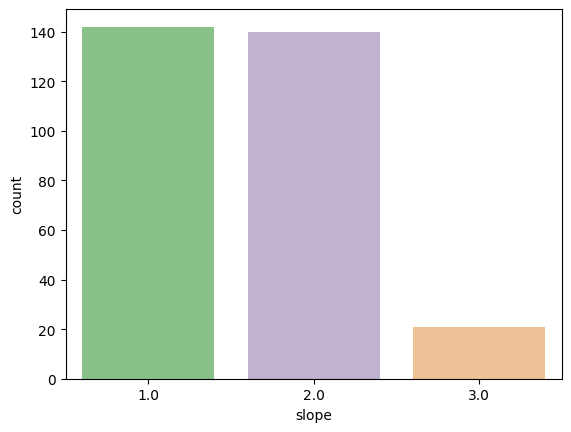

####################### HD #######################
     hd      Ratio
hd                
0   164  54.125413
1   139  45.874587
##################################################


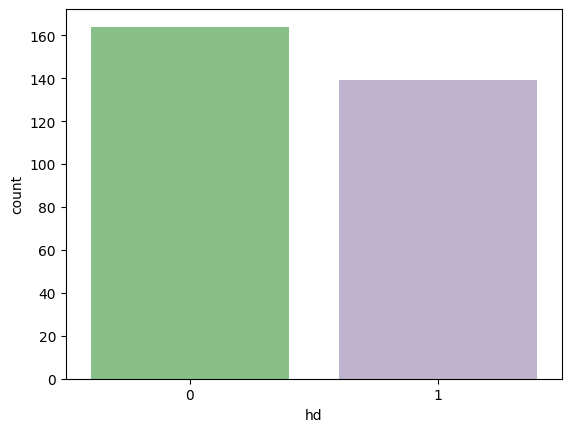

In [12]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#"*50)
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe,palette='Accent')
        plt.show()

for col in cat_cols:
    print((' '+col.upper()+' ').center(50,'#'))
    cat_summary(df,col ,plot=True)

## Numerical Variables

age
count    303.000000
mean      54.438944
std        9.038662
min       29.000000
5%        40.000000
10%       42.000000
25%       48.000000
40%       53.000000
50%       56.000000
60%       58.000000
75%       61.000000
90%       66.000000
95%       68.000000
max       77.000000
Name: age, dtype: float64


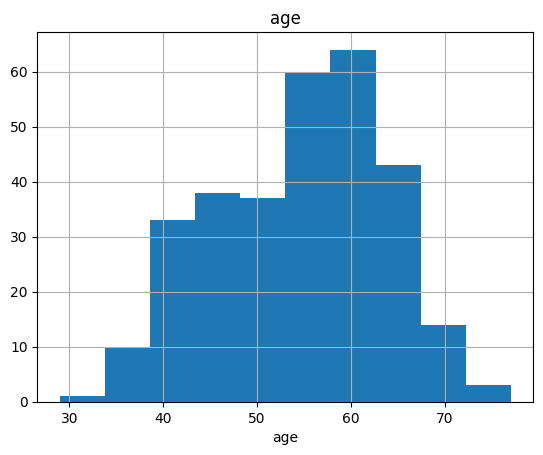


restbp
count    303.000000
mean     131.689769
std       17.599748
min       94.000000
5%       108.000000
10%      110.000000
25%      120.000000
40%      126.000000
50%      130.000000
60%      134.000000
75%      140.000000
90%      152.000000
95%      160.000000
max      200.000000
Name: restbp, dtype: float64


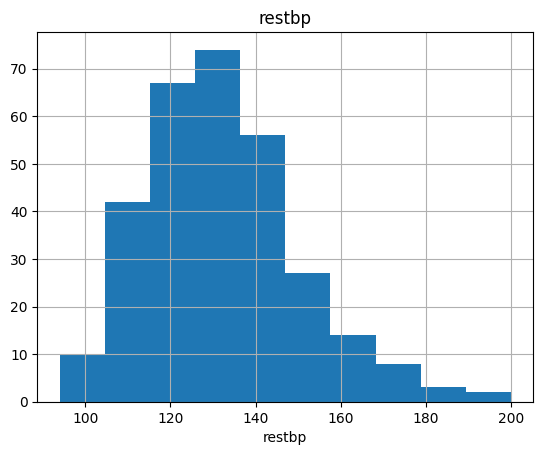


chol
count    303.000000
mean     246.693069
std       51.776918
min      126.000000
5%       175.100000
10%      188.800000
25%      211.000000
40%      230.000000
50%      241.000000
60%      254.000000
75%      275.000000
90%      308.800000
95%      326.900000
max      564.000000
Name: chol, dtype: float64


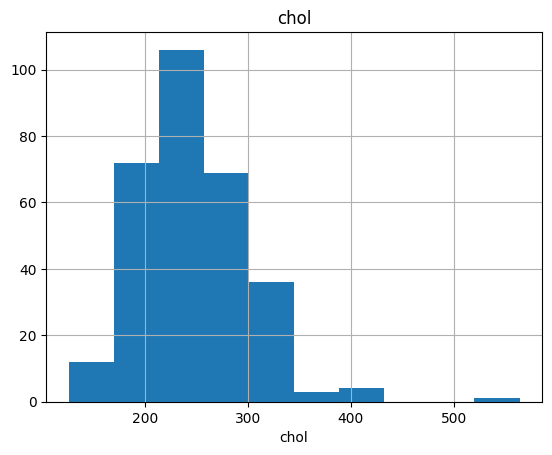


thalach
count    303.000000
mean     149.607261
std       22.875003
min       71.000000
5%       108.100000
10%      116.000000
25%      133.500000
40%      146.000000
50%      153.000000
60%      159.000000
75%      166.000000
90%      176.600000
95%      181.900000
max      202.000000
Name: thalach, dtype: float64


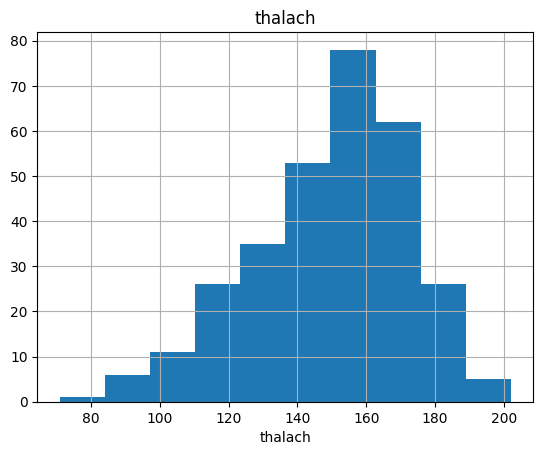


oldpeak
count    303.000000
mean       1.039604
std        1.161075
min        0.000000
5%         0.000000
10%        0.000000
25%        0.000000
40%        0.380000
50%        0.800000
60%        1.120000
75%        1.600000
90%        2.800000
95%        3.400000
max        6.200000
Name: oldpeak, dtype: float64


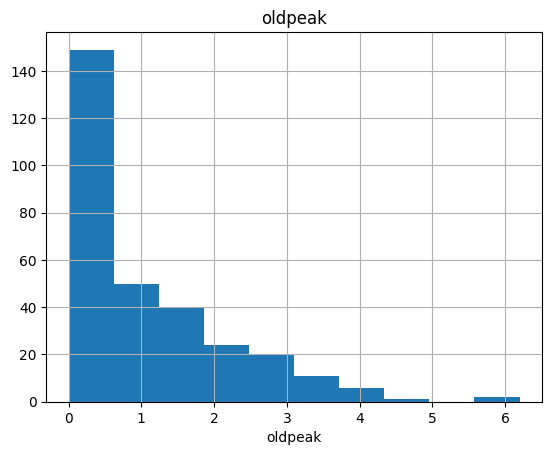

In [13]:
def num_summary(dataframe, col, plot=False):
    quantiles = [0.05, 0.1, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9, 0.95]
    print(dataframe[col].describe(quantiles).T)

    if plot:
      dataframe[col].hist()
      plt.xlabel(col)
      plt.title(col)
      plt.show()

for col in df[num_cols]:
    print(col)
    num_summary(df, col, plot=True)
    print()

## Corelation Analysis

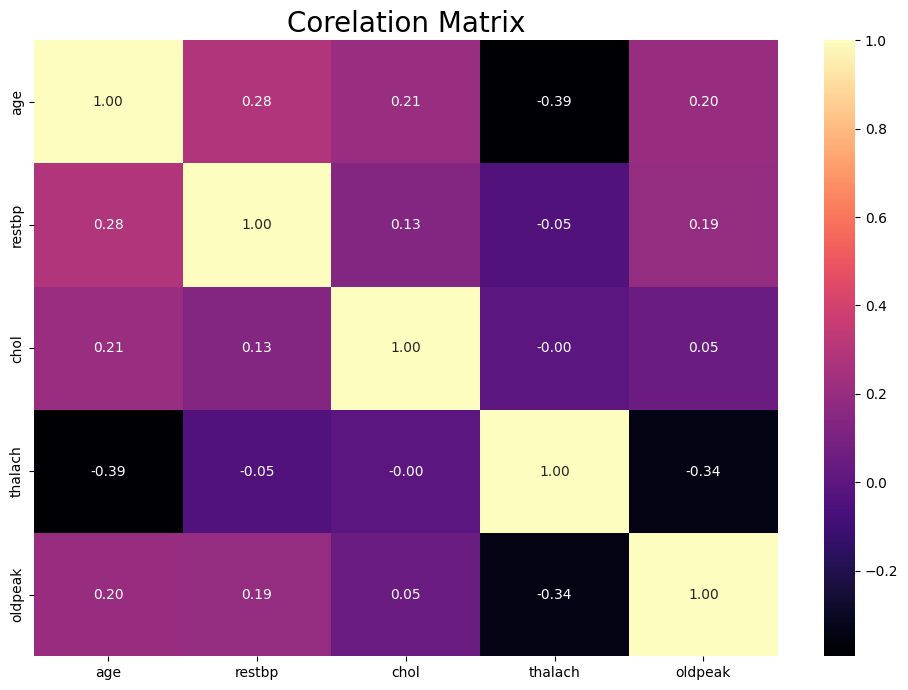

In [14]:
corr_matrix = df[num_cols].corr() #Default Method = 'pearson'
#corr_matrix = df.corr(method='spearman')
#corr_matrix = df.corr(method='pearson')

f, ax = plt.subplots(figsize=[12,8])
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', ax=ax, cmap='magma')
ax.set_title('Corelation Matrix', fontsize=20)
plt.show()

In [15]:
# Query of High Corelation
upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]> 0.9)]
len(drop_list)

0

# Outliers

In [16]:
def outlier_thresholds(dataframe, col_name,  q1=0.25, q3=0.75):
    Q1 = dataframe[col_name].quantile(q1)
    Q3 = dataframe[col_name].quantile(q3)
    IQR = Q3 - Q1
    low = Q1 - 1.5*IQR
    up = Q3 + 1.5*IQR
    return low, up

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up) )].shape[0] > 10:
      print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up) )].head(10))
    else:
      print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up) )])
    if index:
      outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up) )].index
      return outlier_index

number =1
for col in num_cols:
    print(number, '.', col.upper(), end='\n\n')
    grab_outliers(df, col)
    print( '\n',67*' *','\n', end='\n')
    number += 1

1 . AGE

Empty DataFrame
Columns: [age, sex, cp, restbp, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, hd]
Index: []

  * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

2 . RESTBP

      age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca thal  hd
14   52.0  1.0  3.0   172.0  199.0  1.0      0.0    162.0    0.0      0.5    1.0  0.0  7.0   0
83   68.0  1.0  3.0   180.0  274.0  1.0      2.0    150.0    1.0      1.6    2.0  0.0  7.0   1
126  56.0  0.0  4.0   200.0  288.0  1.0      2.0    133.0    1.0      4.0    3.0  2.0  7.0   1
172  59.0  0.0  4.0   174.0  249.0  0.0      0.0    143.0    1.0      0.0    2.0  0.0  3.0   1
183  59.0  1.0  1.0   178.0  270.0  0.0      2.0    145.0    0.0      4.2    3.0  0.0  7.0   0
188  54.0  1.0  2.0   192.0  283.0  0.0      2.0    195.0    0.0      0.0    1.0  1.0  7.0   1
201  64.0  0.0  4.0   180.0  325.0  0.0      0.0   

In [17]:
# Re-assignment with Thresholds
def replace_with_thresholds(dataframe, col):
    low, up = outlier_thresholds(dataframe,col)
    dataframe.loc[dataframe[col] < low, col] = low
    dataframe.loc[dataframe[col] > up, col] = up

for col in num_cols:
    replace_with_thresholds(df, col)

# Encoding

In [18]:
cat_cols = [col for col in cat_cols if col!='hd']

In [19]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

# Scaling

In [20]:
X_scaled = StandardScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)
df.head()

,age,restbp,chol,thalach,oldpeak,hd,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_6.0,thal_7.0,thal_?,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0
0,0.948726,0.821446,-0.265040,0.015306,1.150938,0,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True
1,1.392002,1.723905,0.851214,-1.835388,0.429108,1,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,True,False
2,1.392002,-0.682652,-0.349285,-0.910041,1.421625,1,False,True,False,False,False,True,False,True,False,False,True,False,False,True,True,True,False
3,-1.932564,-0.081013,0.093004,1.645679,2.233684,0,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True
4,-1.489288,-0.081013,-0.875820,0.984717,0.338879,0,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


In [21]:
df.columns

Index(['age', 'restbp', 'chol', 'thalach', 'oldpeak', 'hd', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_?', 'thal_6.0', 'thal_7.0', 'thal_?', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'slope_2.0', 'slope_3.0'], dtype='object')

# Models

In [22]:
X = df.drop('hd',axis=1)
y = df['hd']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)
clf_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

## Model Complexity

In [24]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

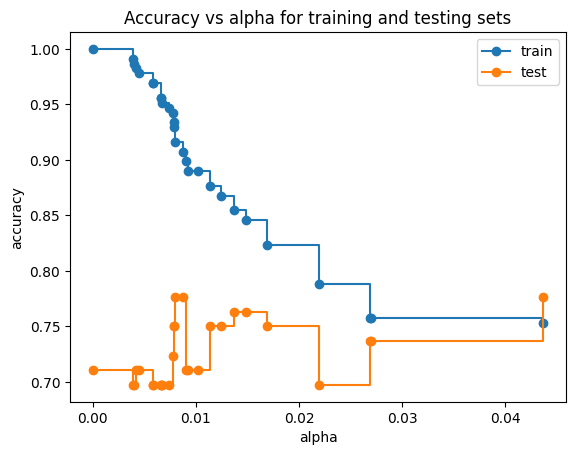

In [25]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<Axes: xlabel='tree'>

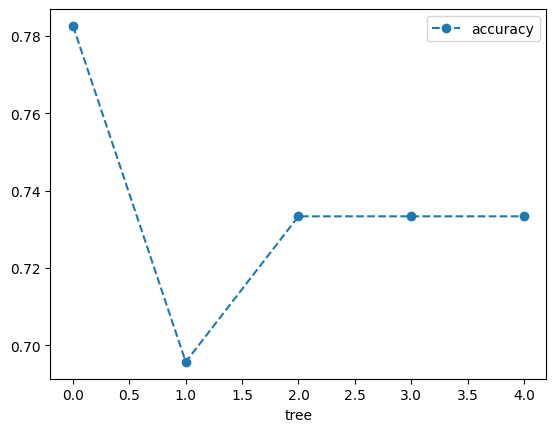

In [26]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.044)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

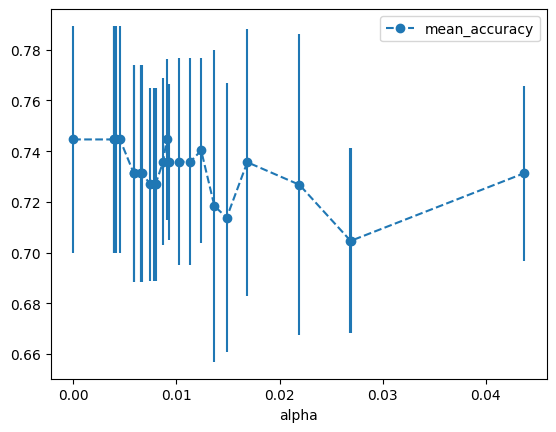

In [27]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')

In [32]:
ideal_ccp_alpha = 0.009

In [33]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

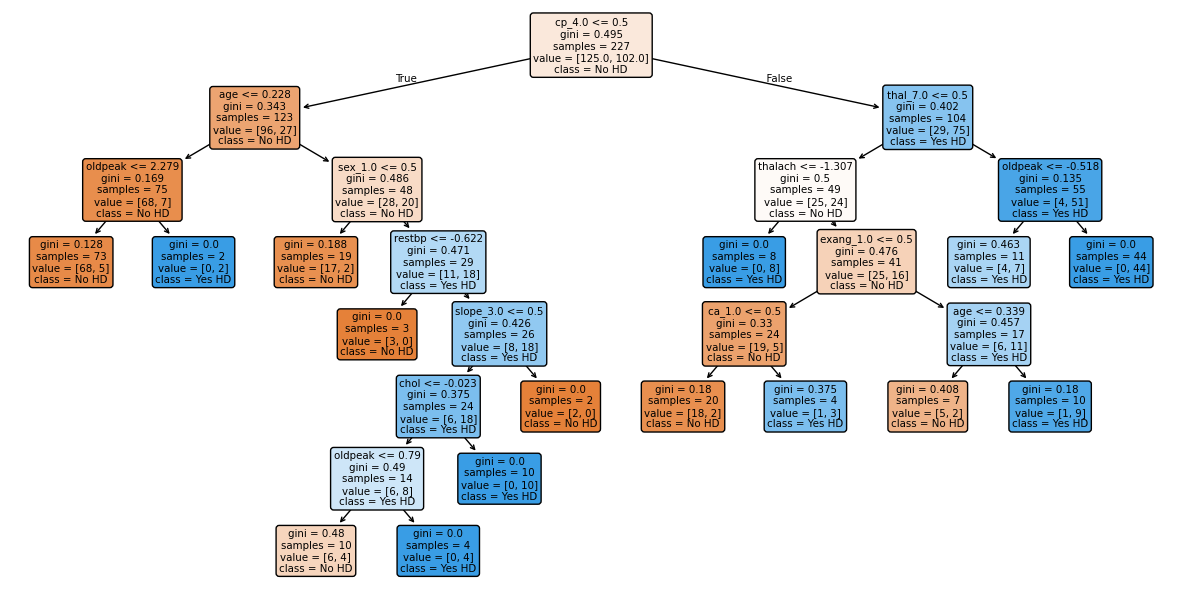

In [36]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X.columns)
plt.savefig('tree.png')